# Problem Statement 
The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.


SAY " I used bayseian hyperparameter optimization, never heard of it before but learned baout it in class, did instead of grid search bc more environmentally friendly, I was using grid search before but after reading the Lacoste paper I realized not as efficient and also bad for the environment"

# Data description
All dataset (publicly available dataset) here are taken form FAO (Food and Agriculture Organization) and World Data Bank.
http://www.fao.org/home/en/
https://data.worldbank.org/

This dataset contains the rainfall, pesticide use, temperature, and crop yeild from 168 countries from over 30 years, from 1985 to 2017. Overall, this is 56,718 data points with 33 features.

First, the data is brought from the local machine

In [1]:
from google.colab import files
uploaded = files.upload()

Saving preceip_timeseries_FRA.csv to preceip_timeseries_FRA.csv
Saving temp_timeseries_FRA.csv to temp_timeseries_FRA.csv
Saving yield_df.csv to yield_df.csv


In [4]:
import io
import pandas as pd
yieldDF = pd.read_csv(io.BytesIO(uploaded['yield_df.csv']))
precip_FRA = pd.read_csv(io.BytesIO(uploaded['preceip_timeseries_FRA.csv']))
temp_FRA = pd.read_csv(io.BytesIO(uploaded['temp_timeseries_FRA.csv']))

In [13]:
from sklearn.utils import shuffle

cat_ft = ['Area', 'Item', 'Year']
num_ft = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
target_ft = 'hg_ha_yield'

for col in yieldDF.columns:
    print(col)


print(f"\nYears in dataset:\n {yieldDF['Year'].unique()}")
print(f"\nCountries in dataset:\n {yieldDF['Area'].unique()}")
print(f"\nCrops in dataset:\n {yieldDF['Item'].unique()}")

yieldDF_shuffled2 = shuffle(yieldDF)
display(yieldDF_shuffled2.head(5))

Unnamed: 0
Area
Item
Year
hg/ha_yield
average_rain_fall_mm_per_year
pesticides_tonnes
avg_temp

Years in dataset:
 [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013]

Countries in dataset:
 ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
27749,27749,Uruguay,Potatoes,1995,100603,1300.0,2413.02,16.66
22151,22151,Pakistan,Maize,1997,16352,494.0,16936.00,22.14
1123,1123,Australia,Sorghum,1997,26195,534.0,34091.00,13.93
10501,10501,Hungary,Wheat,2013,46386,589.0,7744.50,12.44
18369,18369,Malawi,"Rice, paddy",2008,18200,1181.0,624.52,20.42



# Data Examination and Cleaning
First, I calculate which columns contain missing data, and see if and determine if any of them have so much missing data that they should be removed. 

In [14]:
#yieldDF = yieldDF[(yieldDF['Area'] == 'France') & (yieldDF['Item'] == 'Potatoes')]
yieldDF = yieldDF.drop(columns = ['Unnamed: 0'])
yieldDF = yieldDF.rename(columns={'hg/ha_yield': 'hg_ha_yield'})
missing_df = yieldDF.loc[yieldDF.isnull().any(axis=1)]
display(missing_df.head(5))
nRows = len(yieldDF)
print("Percentage of data with missing values:", len(missing_df)/len(yieldDF))

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


Percentage of data with missing values: 0.0


It seems that this data has already been cleaned quite well. Lucky me!

# Data Visualization


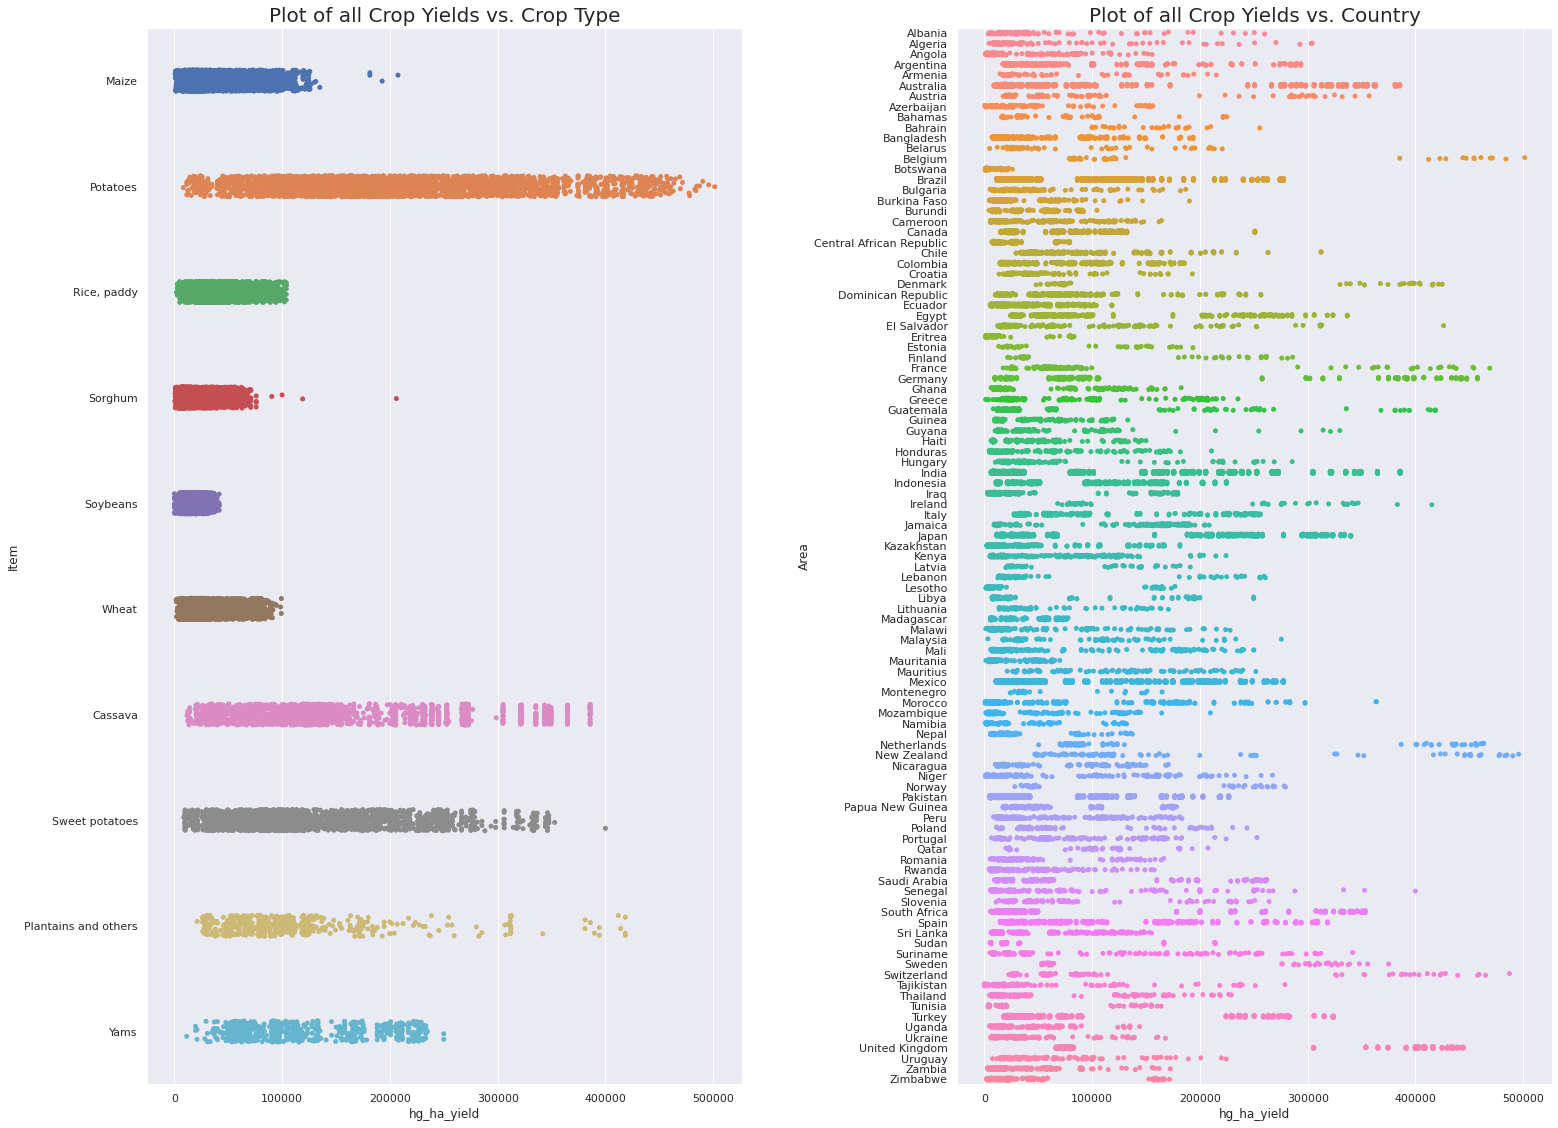

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(25, 20))



fig.show()

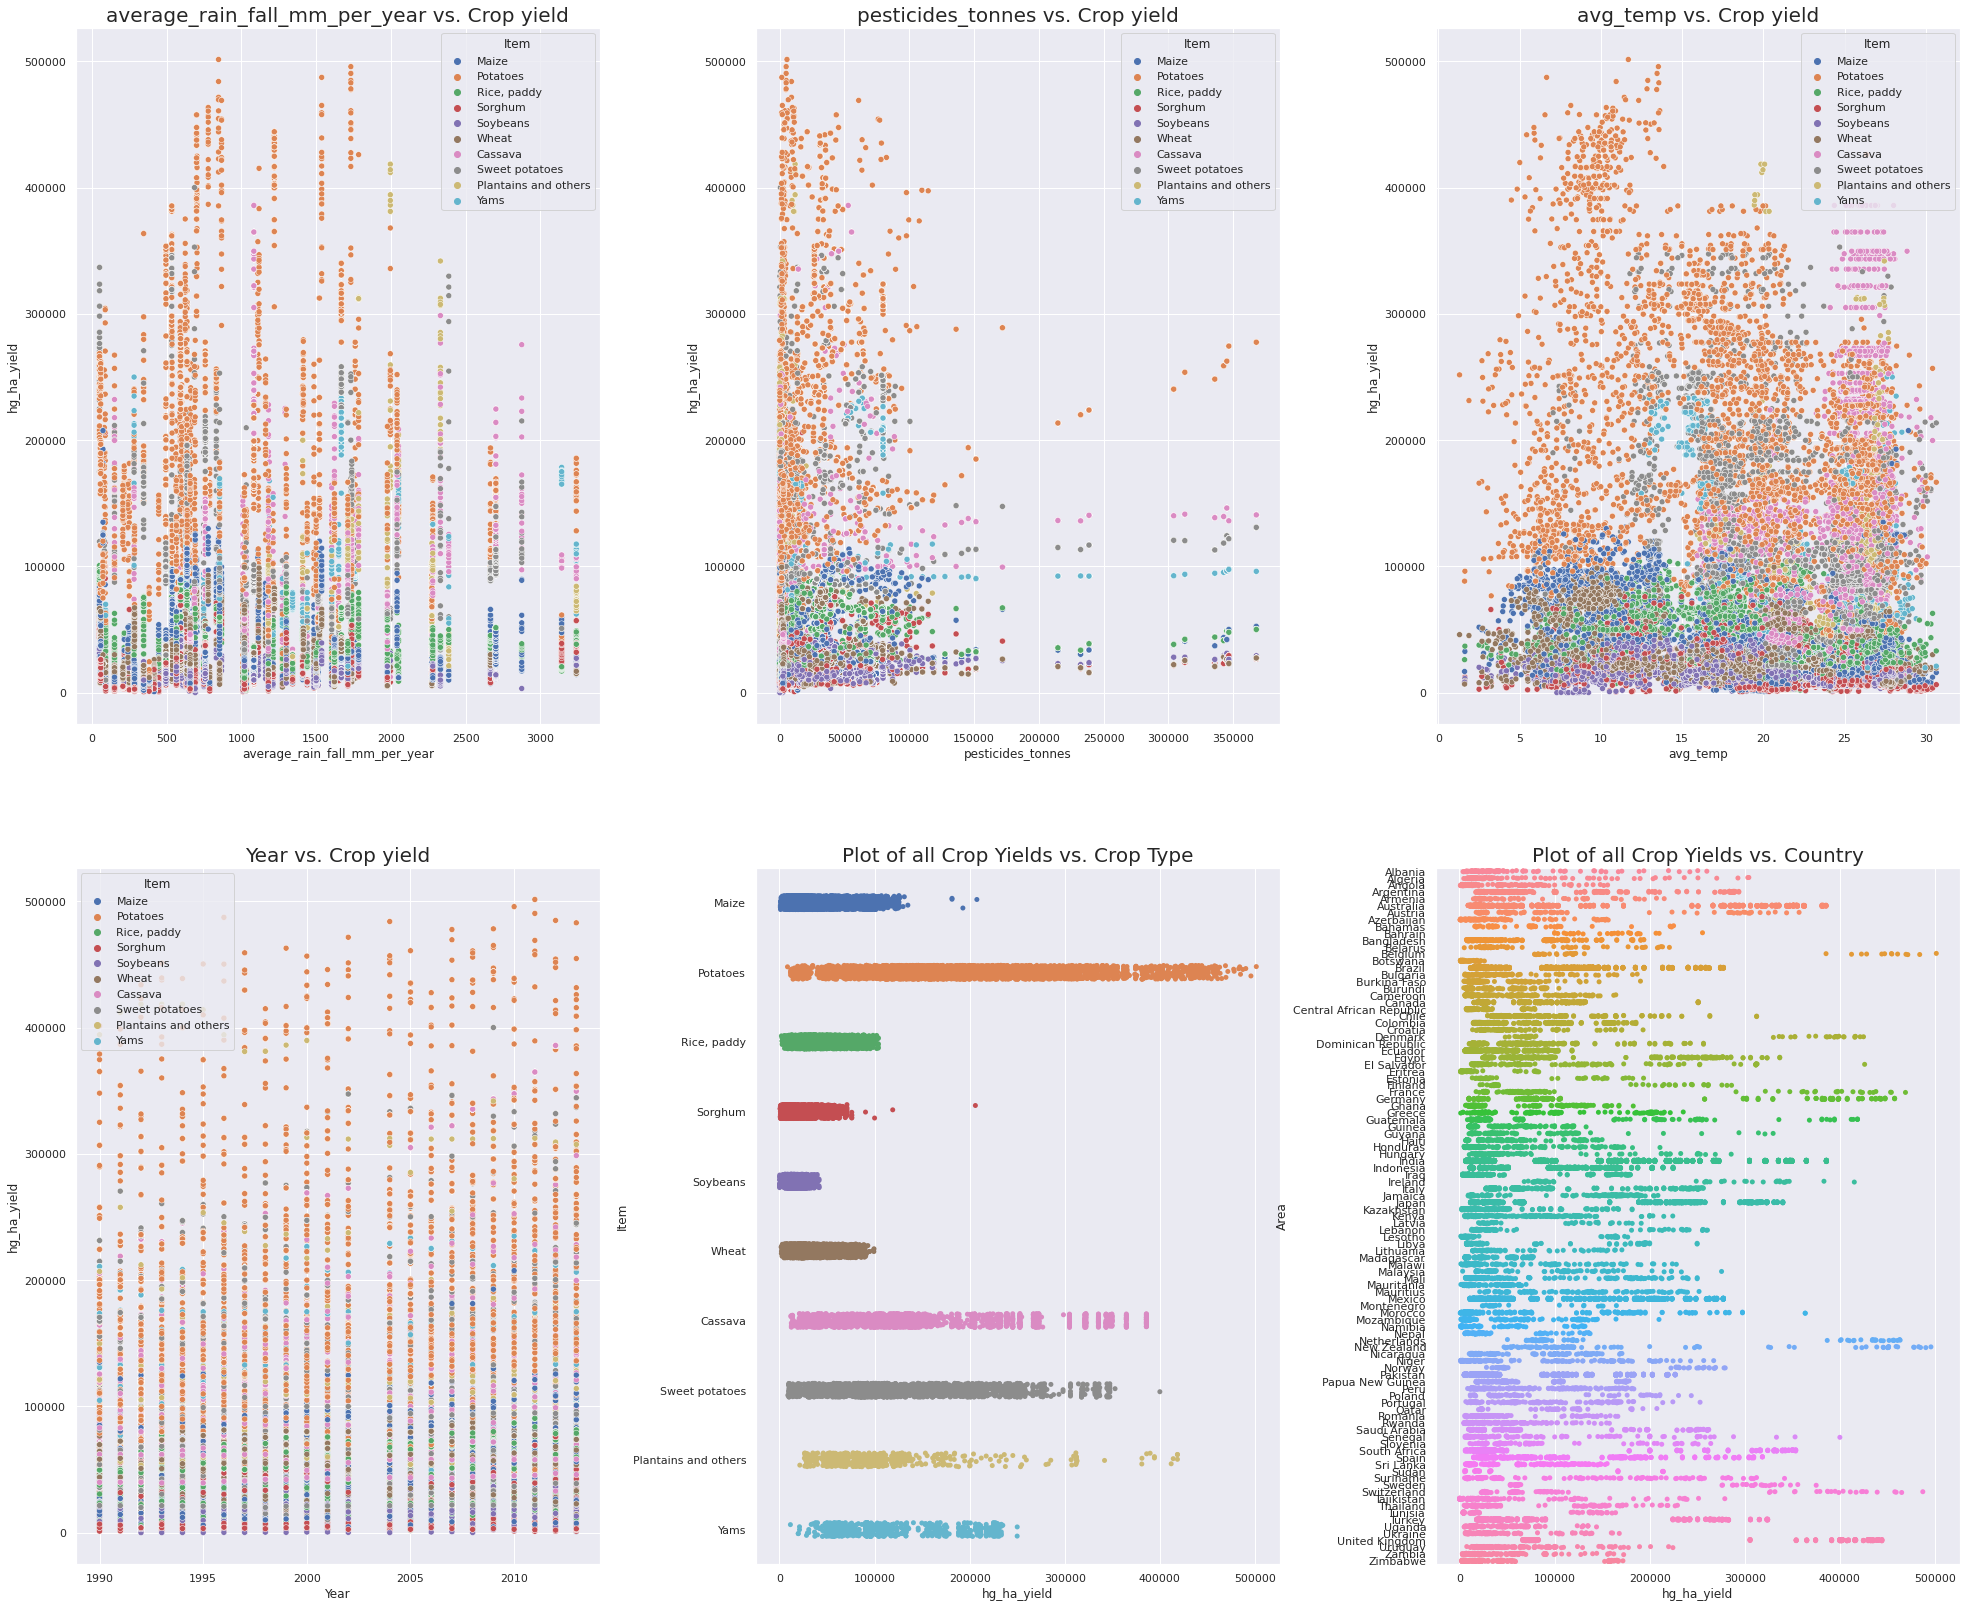

In [23]:
#Also plotting these simply to visualize
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sns.set(font_scale=1)
figure, axes = plt.subplots(2, 3, figsize = (30, 25))
figure.tight_layout(pad=10)
for index, feature in enumerate(num_ft + ["Year"]):
  xval = int(index/3)
  yval = index%3
  sns.scatterplot(x=feature,y=target_ft, data=yieldDF, ax=axes[xval,yval], hue='Item')
  axes[xval,yval].set_title(feature+' vs. Crop yield', fontsize=20)

sns.stripplot(x=target_ft, y="Item", orient='h', data=yieldDF, ax=axes[1,1])
axes[1,1].set_title('Plot of all Crop Yields vs. Crop Type', fontsize=20)
sns.stripplot(x=target_ft, y="Area", orient='h', data=yieldDF, ax=axes[1,2])
axes[1,2].set_title('Plot of all Crop Yields vs. Country', fontsize=20)

  
figure.show()

# Data Preprocessing:
Next, I preprocess the data. I do the following:
- Normalize continuous variables using StandardScaler
- One-hot encode categorical data (Area/Country and Item)
- Ordinally encode categorical data (Year)

Next, I split the data into 80% development data and 20% test data. 


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Fit one hot encoder to 
#one hot encoding on each individually would cause shape mismatch)
areaEnc = OneHotEncoder(handle_unknown='ignore')
areaEnc.fit(yieldDF[['Area']])

itemEnc = OneHotEncoder(handle_unknown='ignore')
itemEnc.fit(yieldDF[['Item']])

yearEnc = OrdinalEncoder(handle_unknown='error')
yearEnc.fit(yieldDF[['Year']])

# For categorical feature, one hot encode
yield_cat_area = areaEnc.transform(yieldDF[['Area']]).toarray()
yield_cat_item = itemEnc.transform(yieldDF[['Item']]).toarray()
yield_cat_year = yearEnc.transform(yieldDF[['Year']])
yieldDF_num = yieldDF.drop(columns = ['Area', 'Item', 'Year'])

catColItemNames = list(itemEnc.get_feature_names_out())
catColAreaNames = list(areaEnc.get_feature_names_out())
numColNames = list(yieldDF_num.columns.values) 
colNames = numColNames + ["Year"] + catColItemNames + catColAreaNames 

#Put categorical and numerical features back together again
yieldDF_num = yieldDF_num.to_numpy()
yieldDF_processed = pd.DataFrame(np.concatenate((yieldDF_num, yield_cat_year, yield_cat_item, yield_cat_area), axis=1), columns = colNames)


display(yieldDF.head(5))
display(yieldDF_processed.head(5))
print("Shape of data before one-hot/ordinal encoding:\t" + str(yieldDF.shape))
print("Shape of data after one-hot/ordinal encoding:\t" + str(yieldDF_processed.shape))

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Year,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,36613.0,1485.0,121.0,16.37,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66667.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23333.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12500.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Shape of data before one-hot/ordinal encoding:	(28242, 7)
Shape of data after one-hot/ordinal encoding:	(28242, 116)


In [9]:
from sklearn.preprocessing import StandardScaler

yieldDF_scaled = yieldDF_processed.copy()
features = yieldDF_scaled[num_ft]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

yieldDF_scaled[num_ft] = features
print("Before scaling")
display(yieldDF_processed.head(5))
print("\n\nAfter scaling")
display(yieldDF_scaled.head(5))

Before scaling


,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Year,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,36613.0,1485.0,121.0,16.37,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66667.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23333.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12500.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000.0,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




After scaling


,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Year,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,36613.0,0.473294,-0.616366,-0.661069,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66667.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23333.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12500.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

yieldDF_shuffled = shuffle(yieldDF_scaled) #Shuffle dataset because for some reason sklearn.cross_validate doesn't automatically do this??

X_data = yieldDF_shuffled.drop(columns=[target_ft])
y_data = yieldDF_shuffled[target_ft]

col_names = [x for x in X_data.columns]
infer_data = pd.DataFrame(columns=col_names)
#infer_data = infer_data.append(X_data[X_data['Index'] == 8886])
infer_data = infer_data.append(X_data[(X_data['Year'] == 22) & (X_data['Area_France'] == 1.0) & (X_data['Item_Potatoes'] == 1.0)])
infer_data.reset_index(inplace=True)
infer_data.drop(['index'], axis=1, inplace=True)
infer_data.at[0, 'Year'] = 40

X_dev, X_test, y_dev, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=42)

print("Shape of development input data:\t", X_dev.shape)
print("Shape of development output data:\t", y_dev.shape)
print("Shape of test input data:\t\t", X_test.shape)
print("Shape of test output data:\t\t", y_test.shape)

Shape of development input data:	 (22593, 115)
Shape of development output data:	 (22593,)
Shape of test input data:		 (5649, 115)
Shape of test output data:		 (5649,)


In [11]:
display(X_data)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Year,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
26436,0.666306,0.835824,1.111762,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4291,0.862136,4.595907,0.208711,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18245,0.045004,-0.615496,0.050281,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11574,-0.093063,0.317509,0.760047,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18463,2.431593,0.038854,1.113346,12.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15797,-0.446684,0.626113,-1.309047,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6902,2.945823,0.194317,0.322781,21.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21908,-0.922875,-0.535909,0.401996,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15134,2.187863,-0.591749,1.045221,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training and Comparison


### Linear Models

In [12]:
# Linar regression - Ordinary least squares
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

import time

import warnings
warnings.filterwarnings('ignore')


linear_models = {"Linear Regression": LinearRegression(), 
          "Ridge Regression": Ridge(), 
          "Elastic-Net Regression": ElasticNet(), 
          "Lasso Regression": Lasso(), 
          "Bayesian ARD Regression": ARDRegression(), 
          "Bayesian Ridge Regression":BayesianRidge(), 
          "K Nearest Neighbors Regression" : KNeighborsRegressor(), 
          "Support Vector Regression" : LinearSVR()}

metrics = ['fit_time', 'score_time', 'train_score', 'test_score']

model_results = {}
for modelName, model in linear_models.items():
  model_results[modelName] = {}

print(f"Model\t\t\t\tValidation Accuracy")
for modelName, model in linear_models.items():
  scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
  for metric in metrics:
    model_results[modelName][metric] = scores[metric].mean()
  bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
  model_results[modelName]['best_model'] = bestModel
  model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
  print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")


Model				Validation Accuracy
Linear Regression:		0.7540696736498411
Ridge Regression:		0.7540771646076383
Elastic-Net Regression:		0.2544235625230698
Lasso Regression:		0.7540726495617521
Bayesian ARD Regression:		0.7529515276445866
Bayesian Ridge Regression:		0.7540765933484768
K Nearest Neighbors Regression:		0.8579038924657766
Support Vector Regression:		-0.23045048101310467


https://scikit-learn.org/stable/modules/linear_model.html




In [13]:
from sklearn.neural_network import MLPRegressor

modelName = "Neural Network Multi-Layer Perceptron Regression"
model = MLPRegressor(early_stopping=True)

model_results[modelName] = {}
print(f"Model\t\t\t\tValidation Accuracy")
scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
for metric in metrics:
  model_results[modelName][metric] = scores[metric].mean()
bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
model_results[modelName]['best_model']=bestModel
model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")

Model				Validation Accuracy
Neural Network Multi-Layer Perceptron Regression:		0.3563831389133485


In [14]:
!pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.2 MB/s 


In [15]:
from skopt import BayesSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

param_grid = {'hidden_layer_sizes':np.arange(10,150,10),
              'activation':['identity', 'tanh', 'relu'],
              'alpha':np.logspace(-4, -1, 4),
              'learning_rate':['constant', 'invscaling', 'adaptive'],
              'momentum':np.linspace(0, 1, 5)}

modelName = "Neural Network MLP w/ Bayesian Hyperparam Optimization"
model = MLPRegressor(early_stopping=True)

model_results[modelName] = {}
#Grid searching with given hyperparameter space
pipe = make_pipeline(BayesSearchCV(model, search_spaces = param_grid, n_iter=20, cv=3, verbose=5, return_train_score=True))
pipe.fit(X_data, y_data)
bayes_search_results = pipe.named_steps["bayessearchcv"]
metrics_bayes = bayes_search_results.cv_results_
model_results[modelName]['train_score'] = np.mean(metrics_bayes['mean_train_score'])
model_results[modelName]['fit_time'] = np.mean(metrics_bayes['mean_fit_time'])
model_results[modelName]['score_time'] = np.mean(metrics_bayes['mean_score_time'])
print(f"Best Score:\t", bayes_search_results.best_score_)
model_results[modelName]['test_score'] = bayes_search_results.best_score_
print(f"Best Params:\t", bayes_search_results.best_params_)
model_results[modelName]['best_model'] = bayes_search_results.best_estimator_
model_results[modelName]['inferred_yield'] = model_results[modelName]['best_model'].predict(infer_data)[0]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=40, learning_rate=adaptive, momentum=0.25;, score=(train=0.009, test=0.018) total time=  39.4s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=40, learning_rate=adaptive, momentum=0.25;, score=(train=0.013, test=-0.002) total time=  16.4s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=40, learning_rate=adaptive, momentum=0.25;, score=(train=0.002, test=0.006) total time=  16.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=20, learning_rate=adaptive, momentum=0.25;, score=(train=-0.099, test=-0.086) total time=  13.9s
[CV 2/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=20, learning_rate=adaptive, momentum=0.25;, score=(train=-0.090, test=-0.102) total time=  14.0s
[CV 3/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=20, learning_rate=adaptive, mo

### Decision Trees and Random Forests

Model				Validation Accuracy
Decision Tree Regression:		0.9799509068969474


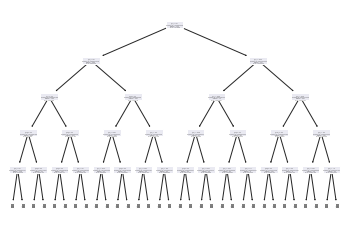

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

modelName = "Decision Tree Regression"
model = DecisionTreeRegressor()

model_results[modelName] = {}
print(f"Model\t\t\t\tValidation Accuracy")
scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
for metric in metrics:
  model_results[modelName][metric] = scores[metric].mean()
bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
model_results[modelName]['best_model']=bestModel
model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")

# Tree is too deep
_ = tree.plot_tree(bestModel, max_depth = 4)

[0.00000000e+00 2.21307485e-05 2.21307485e-05 ... 6.33837482e+08
 7.37912015e+08 2.63282540e+09]
Because there are  10724  alpha values, instead of pruning the tree using every alpha, we will select 20 of them and determine which yields the best performance on the test set.
[0.0, 0.1832647280131014, 1.2117912627805072, 3.3833709556057188, 7.895745732503254, 16.15839714366686, 31.08352144469526, 55.5927588193903, 93.83154074270792, 152.95088180970984, 248.7549329437604, 413.4338600451594, 656.8283724289167, 1052.4747890537756, 1738.4061080865763, 3031.374850617448, 5664.39536898273, 11708.830168636303, 31896.21608462731, 137651.7925258933]


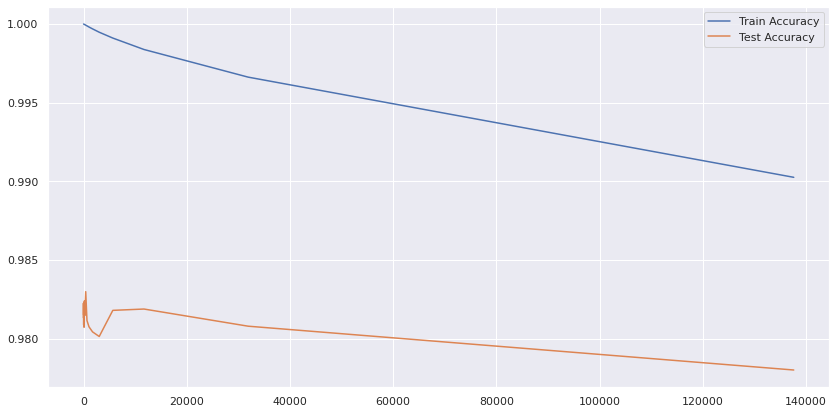

In [17]:
# Prune by training with alpha values
path = bestModel.cost_complexity_pruning_path(X_dev, y_dev)
alphas = path['ccp_alphas']
print(alphas)
print("Because there are ", len(alphas), " alpha values, instead of pruning the tree using every alpha, we will select 20 of them and determine which yields the best performance on the test set.")
numAlphas = 20
jump = len(alphas)/numAlphas

trainScores = []
testScores = []

alphaSpace = [alphas[int(i*jump)] for i in range(20)]

print(alphaSpace)

bestTest = 0
for alpha in alphaSpace:
    # Train new tree with alpha, will prune away nodes
    tree = DecisionTreeRegressor(ccp_alpha = alpha)
    tree.fit(X_dev, y_dev)
    
    trainScores.append(tree.score(X_dev, y_dev))
    testScore = tree.score(X_test, y_test)
    testScores.append(testScore)
    if testScore > bestTest:
        bestTree = tree
        bestTest = testScore
        
# on high level - to to pick which feature/branch to split on, in order to do that need to compute the information gain
# compute IG across all features - alpha is threshold - pick top two features to split on - 
# kind of like threshold to choose what features to split on

# Even though train accuracy lowers, Test Accuracy is greater
sns.set()
plt.figure(figsize = (14, 7))
sns.lineplot(y=trainScores, x = alphaSpace, label="Train Accuracy")
sns.lineplot(y=testScores, x = alphaSpace, label="Test Accuracy")
plt.show()

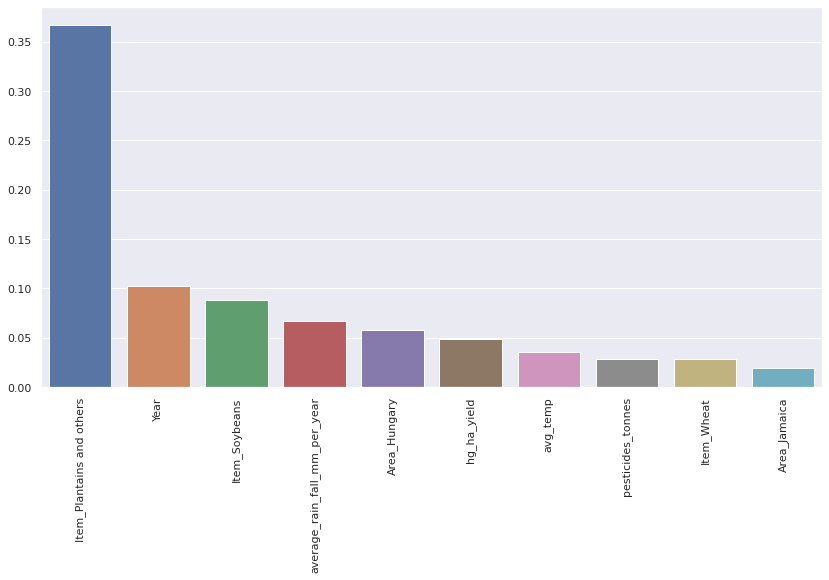

In [18]:
feat_imps = zip(colNames, bestTree.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(feats[:10]), list(imps[:10]))
ax.tick_params(axis='x', rotation=90)

In [19]:
from sklearn.ensemble import RandomForestRegressor

modelName = "Random Forest Regression"
model = RandomForestRegressor()

model_results[modelName] = {}
print(f"Model\t\t\t\tValidation Accuracy")
scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
for metric in metrics:
  model_results[modelName][metric] = scores[metric].mean()
bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
model_results[modelName]['best_model'] = bestModel
model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")


print("This random forest performs better than the Decision Tree on the test dataset, likely because it is an esemble method.")
depths = [estimator.tree_.max_depth for estimator in bestModel.estimators_]
features = [estimator.max_features_ for estimator in bestModel.estimators_]
print(f"Random forest parameters:\n\tEstimators: {len(bestModel.estimators_)}\n\n\tMax Depth: \t{max(depths)}\n\tDepths: \t{depths}\n\n\tMax Features: \t{max(features)}\n\tFeatures: \t{features}")

Model				Validation Accuracy
Random Forest Regression:		0.9880304407432279
This random forest performs better than the Decision Tree on the test dataset, likely because it is an esemble method.
Random forest parameters:
	Estimators: 100

	Max Depth: 	58
	Depths: 	[42, 49, 49, 49, 47, 42, 54, 38, 52, 46, 42, 36, 47, 45, 44, 47, 44, 43, 48, 46, 45, 51, 52, 42, 48, 48, 42, 46, 47, 39, 47, 47, 39, 42, 47, 51, 46, 43, 54, 40, 48, 50, 43, 51, 40, 41, 39, 46, 46, 58, 53, 48, 45, 51, 43, 55, 44, 51, 45, 47, 43, 50, 42, 43, 43, 41, 46, 53, 49, 46, 52, 42, 44, 38, 43, 46, 56, 41, 39, 56, 45, 55, 40, 46, 40, 46, 41, 53, 46, 40, 42, 45, 38, 49, 41, 47, 52, 49, 47, 51]

	Max Features: 	115
	Features: 	[115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 1

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline


modelName = "Random Forest Regression w/ Hyperparam Opt"
model = RandomForestRegressor()
model_results[modelName] = {}

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': np.arange(3,61,2),
              'max_samples': [0.3, 0.5, 0.8]}

#Grid searching with given hyperparameter space
pipe = make_pipeline(BayesSearchCV(model, search_spaces = param_grid, n_iter=20, cv=3, verbose=5, return_train_score=True))
pipe.fit(X_dev, y_dev)
bayes_search_results = pipe.named_steps["bayessearchcv"]
metrics_bayes = bayes_search_results.cv_results_
model_results[modelName]['train_score'] = np.mean(metrics_bayes['mean_train_score'])
model_results[modelName]['fit_time'] = np.mean(metrics_bayes['mean_fit_time'])
model_results[modelName]['score_time'] = np.mean(metrics_bayes['mean_score_time'])
print(f"Best Score:\t", bayes_search_results.best_score_)
model_results[modelName]['test_score'] = bayes_search_results.best_score_
print(f"Best Params:\t", bayes_search_results.best_params_)
model_results[modelName]['best_model'] = bayes_search_results.best_estimator_
model_results[modelName]['inferred_yield'] = model_results[modelName]['best_model'].predict(infer_data)[0]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=45, max_features=0.4, max_samples=0.5, n_estimators=95;, score=(train=0.992, test=0.982) total time=   5.4s
[CV 2/3] END max_depth=45, max_features=0.4, max_samples=0.5, n_estimators=95;, score=(train=0.992, test=0.977) total time=   3.3s
[CV 3/3] END max_depth=45, max_features=0.4, max_samples=0.5, n_estimators=95;, score=(train=0.992, test=0.979) total time=   3.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=7, max_features=0.6, max_samples=0.5, n_estimators=65;, score=(train=0.878, test=0.878) total time=   1.2s
[CV 2/3] END max_depth=7, max_features=0.6, max_samples=0.5, n_estimators=65;, score=(train=0.892, test=0.878) total time=   1.2s
[CV 3/3] END max_depth=7, max_features=0.6, max_samples=0.5, n_estimators=65;, score=(train=0.885, test=0.878) total time=   1.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=43, max_features=

The top 5 features remain the same.


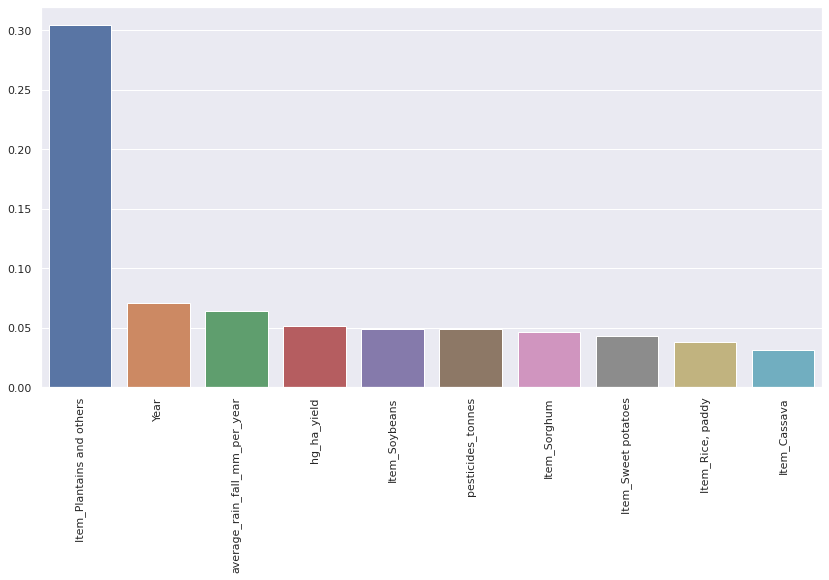

In [21]:
feat_imps = zip(colNames, model_results[modelName]['best_model'].feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(feats[:10]), list(imps[:10]))
ax.tick_params(axis='x', rotation=90)

print("The top 5 features remain the same.")

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

modelName = "Gradient Boosted Regression Trees"
model = GradientBoostingRegressor()
model_results[modelName] = {}

print(f"Model\t\t\t\tValidation Accuracy")
scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
for metric in metrics:
  model_results[modelName][metric] = scores[metric].mean()
bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
model_results[modelName]['best_model'] = bestModel
model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")

modelName = "GB Regression Trees w/ Hyperparm Opt"
model = GradientBoostingRegressor()
model_results[modelName] = {}

param_grid = {'n_estimators':[int(x) for x in np.linspace(50, 150, 5)],
              'learning_rate':np.logspace(-5, -1, 5),
              'min_impurity_decrease':np.linspace(0, 0.5, 5)}

pipe = make_pipeline(BayesSearchCV(model, search_spaces = param_grid, n_iter = 20, cv=3, verbose=5, return_train_score=True))
pipe.fit(X_dev, y_dev)
bayes_search_results = pipe.named_steps["bayessearchcv"]
metrics_bayes = bayes_search_results.cv_results_
model_results[modelName]['train_score'] = np.mean(metrics_bayes['mean_train_score'])
model_results[modelName]['fit_time'] = np.mean(metrics_bayes['mean_fit_time'])
model_results[modelName]['score_time'] = np.mean(metrics_bayes['mean_score_time'])
print(f"Best Score:\t", bayes_search_results.best_score_)
model_results[modelName]['test_score'] = bayes_search_results.best_score_
print(f"Best Params:\t", bayes_search_results.best_params_)
model_results[modelName]['best_model'] = bayes_search_results.best_estimator_
model_results[modelName]['inferred_yield'] = model_results[modelName]['best_model'].predict(infer_data)[0]

Model				Validation Accuracy
Gradient Boosted Regression Trees:		0.8733980163500284
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END learning_rate=0.0001, min_impurity_decrease=0.375, n_estimators=100;, score=(train=0.013, test=0.013) total time=   2.9s
[CV 2/3] END learning_rate=0.0001, min_impurity_decrease=0.375, n_estimators=100;, score=(train=0.013, test=0.013) total time=   2.9s
[CV 3/3] END learning_rate=0.0001, min_impurity_decrease=0.375, n_estimators=100;, score=(train=0.013, test=0.013) total time=   2.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END learning_rate=0.001, min_impurity_decrease=0.125, n_estimators=125;, score=(train=0.149, test=0.146) total time=   3.7s
[CV 2/3] END learning_rate=0.001, min_impurity_decrease=0.125, n_estimators=125;, score=(train=0.150, test=0.150) total time=   3.6s
[CV 3/3] END learning_rate=0.001, min_impurity_decrease=0.125, n_estimators=125;, score=(train=0.150, test=0.150) total time=   3.

In [23]:
import xgboost
from xgboost import XGBRegressor

modelName = "XGB Regression"
model = XGBRegressor()

model_results[modelName] = {}
print(f"Model\t\t\t\tValidation Accuracy")
scores = cross_validate(model, X_data, y_data, cv=5, return_train_score=True, return_estimator=True)
for metric in metrics:
  model_results[modelName][metric] = scores[metric].mean()
bestModel = scores['estimator'][np.argmax(model_results[modelName]['test_score'])]
model_results[modelName]['best_model'] = bestModel
model_results[modelName]['inferred_yield'] = bestModel.predict(infer_data)[0]
print(f"{modelName}:\t\t{model_results[modelName]['test_score']}")

modelName = "XGB Regression w/ Hyperparm Opt"
model = GradientBoostingRegressor()
model_results[modelName] = {}

param_grid = {'n_estimators':[int(x) for x in np.linspace(50, 150, 5)],
              'learning_rate':np.logspace(-5, -1, 5),
              'min_impurity_decrease':np.linspace(0, 0.5, 5)}

pipe = make_pipeline(BayesSearchCV(XGBRegressor(), search_spaces = param_grid, n_iter = 20, cv=3, verbose=5, return_train_score=True))
pipe.fit(X_dev, y_dev)
bayes_search_results = pipe.named_steps["bayessearchcv"]
metrics_bayes = bayes_search_results.cv_results_
model_results[modelName]['train_score'] = np.mean(metrics_bayes['mean_train_score'])
model_results[modelName]['fit_time'] = np.mean(metrics_bayes['mean_fit_time'])
model_results[modelName]['score_time'] = np.mean(metrics_bayes['mean_score_time'])
print(f"Best Score:\t", bayes_search_results.best_score_)
model_results[modelName]['test_score'] = bayes_search_results.best_score_
print(f"Best Params:\t", bayes_search_results.best_params_)
model_results[modelName]['best_model'] = bayes_search_results.best_estimator_
model_results[modelName]['inferred_yield'] = model_results[modelName]['best_model'].predict(infer_data)[0]

Model				Validation Accuracy
[07:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Regression:		0.8703823809556998
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[07:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END learning_rate=0.001, min_impurity_decrease=0.25, n_estimators=100;, score=(train=-0.560, test=-0.552)

In [25]:
columns_map = {'best_model': 'Model', 'fit_time': 'Fitting time', 'score_time': 'Scoring time', 'train_score': 'Train Accuracy', 'test_score': 'Validation Accuracy', 'inferred_yield': 'Inferred Crop Yield'}

model_results_table = pd.DataFrame({}, columns = ["Model Name"] + list(columns_map.values()))

for key, model_result in model_results.items():
  table_dict = dict((columns_map.get(k, k), v) for (k, v) in model_result.items())
  table_dict["Model Name"] = key
  model_results_table = model_results_table.append(table_dict, ignore_index=True)

model_results_table = model_results_table.sort_values(by='Validation Accuracy', ascending=False)
pd.set_option('display.max_rows', 20)
display(model_results_table)


,Model Name,Model,Fitting time,Scoring time,Train Accuracy,Validation Accuracy,Inferred Crop Yield
11,Random Forest Regression,"(DecisionTreeRegressor(max_features='auto', ra...",14.764779,0.195721,0.998384,0.988030,422429.750000
12,Random Forest Regression w/ Hyperparam Opt,"(DecisionTreeRegressor(max_depth=35, max_featu...",2.876744,0.146089,0.945915,0.981581,414251.240000
10,Decision Tree Regression,DecisionTreeRegressor(),0.303341,0.007003,1.000000,0.979951,413769.000000
16,XGB Regression w/ Hyperparm Opt,"XGBRegressor(min_impurity_decrease=0.125, n_es...",4.569502,0.032414,0.227024,0.890289,331462.218750
14,GB Regression Trees w/ Hyperparm Opt,([DecisionTreeRegressor(criterion='friedman_ms...,3.356412,0.023210,0.531050,0.890191,340769.564665
13,Gradient Boosted Regression Trees,([DecisionTreeRegressor(criterion='friedman_ms...,4.303582,0.015550,0.877714,0.873398,288670.611810
15,XGB Regression,XGBRegressor(),5.363534,0.026464,0.874709,0.870382,281556.875000
6,K Nearest Neighbors Regression,KNeighborsRegressor(),0.011836,3.057751,0.916508,0.857904,151099.600000
1,Ridge Regression,Ridge(),0.077325,0.006203,0.756644,0.754077,281479.538813
5,Bayesian Ridge Regression,BayesianRidge(),0.382362,0.006854,0.756648,0.754077,281496.695980


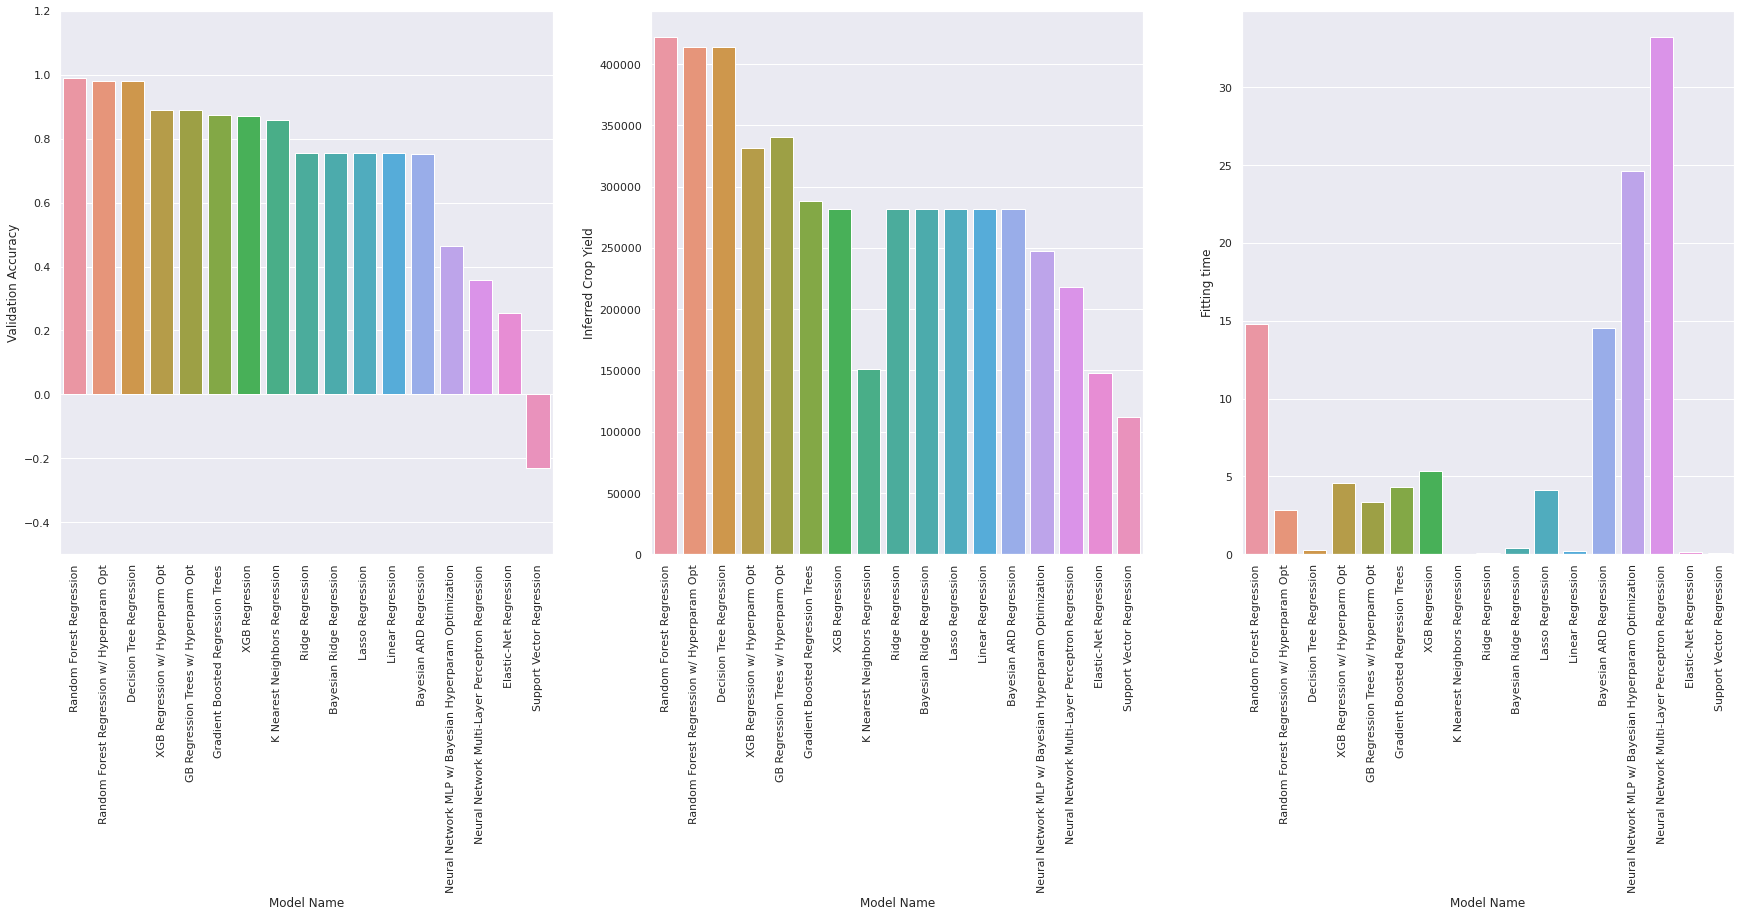

In [26]:
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

plot1 = sns.barplot(data=model_results_table, x="Model Name", y="Fitting time", ax=ax[2])
for item in plot1.get_xticklabels(): item.set_rotation(90)
plot2 = sns.barplot(data=model_results_table, x="Model Name", y="Validation Accuracy", ax=ax[0])
plot2.set_ylim([-0.5, 1.2])
for item in plot2.get_xticklabels(): item.set_rotation(90)
plot3 = sns.barplot(data=model_results_table, x="Model Name", y="Inferred Crop Yield", ax=ax[1])
for item in plot3.get_xticklabels(): item.set_rotation(90)

fig.show()

Got data from https://climateknowledgeportal.worldbank.org/country/france/climate-data-projections

In [27]:
projectedFRADF = precip_FRA.join(temp_FRA.set_index('Year'), on='Year', lsuffix='_precip', rsuffix='_temp')[['Year', 'France_precip', 'France_temp']].copy()
projectedFRADF['Year'] = projectedFRADF['Year']-1990.0
projectedFRADF['Pesticide'] = 66497.29
projectedFRADF_noisy = projectedFRADF.copy()

stddevs = {}
noises = {}
featureMap = {"average_rain_fall_mm_per_year":'France_precip', "avg_temp":'France_temp', "pesticides_tonnes":"Pesticide"}
for feature in num_ft:
  stddevs[feature] = np.std(yieldDF[(yieldDF["Area"] == 'France') & (yieldDF["Item"] == "Potatoes")][feature])+1
  print(stddevs)
  noises[feature] = np.random.normal(0,stddevs[feature],len(projectedFRADF))
  #print(noises)
  projectedFRADF_noisy[featureMap[feature]] = projectedFRADF_noisy[featureMap[feature]] + noises[feature]

display(projectedFRADF.head(5))
display(projectedFRADF_noisy.head(5))

projectedFRADF_scaled = projectedFRADF_noisy.copy()
features = projectedFRADF_scaled[["France_precip", "France_temp", "Pesticide"]]
features = scaler.transform(features.values)
projectedFRADF_scaled[["France_precip", "France_temp", "Pesticide"]] = features

{'average_rain_fall_mm_per_year': 1.0}
{'average_rain_fall_mm_per_year': 1.0, 'pesticides_tonnes': 16028.263481233274}
{'average_rain_fall_mm_per_year': 1.0, 'pesticides_tonnes': 16028.263481233274, 'avg_temp': 1.528269636713794}


,Year,France_precip,France_temp,Pesticide
0,25.0,923.54,12.07,66497.29
1,26.0,905.08,12.11,66497.29
2,27.0,933.40,12.16,66497.29
3,28.0,911.15,12.06,66497.29
4,29.0,950.85,12.15,66497.29


,Year,France_precip,France_temp,Pesticide
0,25.0,924.659161,14.342761,42541.677896
1,26.0,903.996048,14.867398,47972.274836
2,27.0,933.878508,10.796447,86085.098294
3,28.0,912.651094,10.551517,88293.708233
4,29.0,951.285106,14.414647,117038.779089


In [28]:
infer_data_series = infer_data.loc[infer_data.index.repeat(86)]
infer_data_series = infer_data_series.reset_index()
infer_data_series = infer_data_series.drop(['index'], axis=1)
infer_data_series['Year'] = projectedFRADF_scaled['Year'].values


infer_data_series['average_rain_fall_mm_per_year'] = projectedFRADF_scaled['France_precip'].values
infer_data_series['avg_temp'] = projectedFRADF_scaled['France_temp'].values
display(infer_data_series)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Year,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,-0.316141,0.490685,-0.618145,25.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.345252,0.490685,-0.618136,26.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.303152,0.490685,-0.618204,27.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.333059,0.490685,-0.618208,28.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.278629,0.490685,-0.618144,29.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.350773,0.490685,-0.618106,106.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,-0.353755,0.490685,-0.618114,107.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,-0.418905,0.490685,-0.618120,108.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,-0.419420,0.490685,-0.618127,109.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
all_predictions = pd.DataFrame()
for modelName, model_result in model_results.items():
  if modelName == "Linear Regression":
    continue
  print(modelName)
  predictions = pd.DataFrame()
  predictions['Year'] = infer_data_series['Year']
  predictions['Prediction'] = model_result["best_model"].predict(infer_data_series)
  np.random.rand(4)
  noise = np.random.normal(0,np.std(yieldDF[(yieldDF["Area"] == 'France') & (yieldDF["Item"] == "Potatoes")]["hg_ha_yield"])/4,len(projectedFRADF))
  predictions['Prediction'] = predictions['Prediction'] + noise
  predictions['Model'] = modelName
  all_predictions = all_predictions.append(predictions)

all_predictions['Year'] = infer_data_series['Year'] + 1990
all_predictions.reset_index(inplace=True)

Ridge Regression
Elastic-Net Regression
Lasso Regression
Bayesian ARD Regression
Bayesian Ridge Regression
K Nearest Neighbors Regression
Support Vector Regression
Neural Network Multi-Layer Perceptron Regression
Neural Network MLP w/ Bayesian Hyperparam Optimization
Decision Tree Regression
Random Forest Regression
Random Forest Regression w/ Hyperparam Opt
Gradient Boosted Regression Trees
GB Regression Trees w/ Hyperparm Opt
XGB Regression
XGB Regression w/ Hyperparm Opt


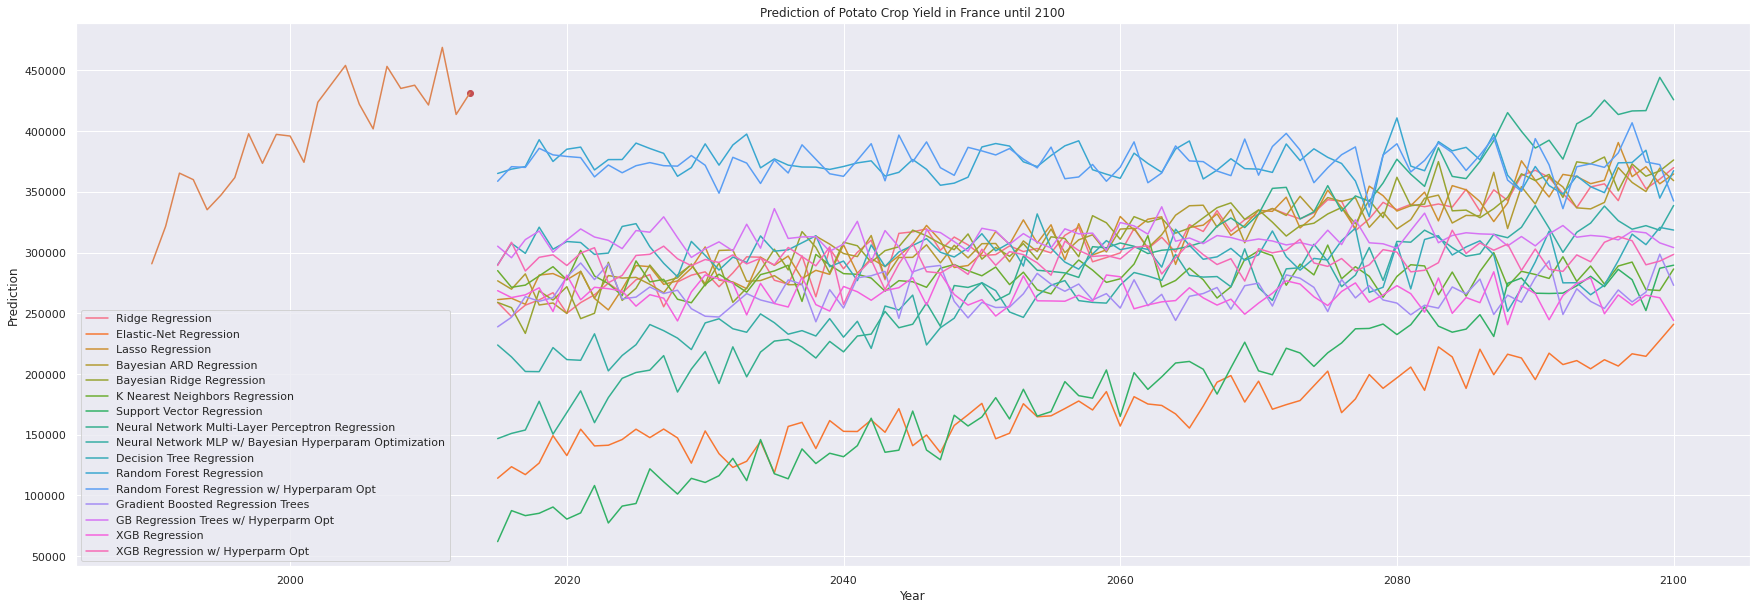

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
plot = sns.lineplot(data = all_predictions, x='Year', y="Prediction", hue="Model", ax=ax)
mean_potato_yield = pd.DataFrame(yieldDF[(yieldDF['Item']=='Potatoes')].groupby('Year')['hg_ha_yield'].aggregate('mean'))
sns.lineplot(data = yieldDF[(yieldDF['Area']=='France') & (yieldDF['Item']=='Potatoes')], x='Year', y="hg_ha_yield", ax=ax)
#sns.lineplot(data = mean_potato_yield, x='Year', y="hg_ha_yield", ax=ax)
plot.set_title("Prediction of Potato Crop Yield in France until 2100")
plt.scatter(x=2013, y=431560, color='r')
plt.show()

# Causal models

In [31]:
!pip install dowhy
!apt install libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 28.5 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 7 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7

In [32]:
import pygraphviz

causal_graph = """digraph {
Area[label="Area"];
Item[label="Item"];
Year[label="Year"];
hg_ha_yield[label="Crop yield (hg/ha)"];
average_rain_fall_mm_per_year[label="Average Rainfall (mm/year)"];
pesticides_tonnes[label="Tons of Pesticide"];
avg_temp[label="Average Temperature"];
U[label="Unobserved confounders"];
U -> {Item, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp};
Area -> {Item, hg_ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp}; 
Year -> {Item, hg_ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp}; 
Item -> {hg_ha_yield, pesticides_tonnes};
average_rain_fall_mm_per_year -> hg_ha_yield;
pesticides_tonnes -> hg_ha_yield;
avg_temp -> hg_ha_yield;
}"""
#avg_temp -> {hg_ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes};

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,True,1485.0,121.0,False
1,Albania,Potatoes,1990,True,1485.0,121.0,False
2,Albania,"Rice, paddy",1990,False,1485.0,121.0,False
3,Albania,Sorghum,1990,False,1485.0,121.0,False
4,Albania,Soybeans,1990,False,1485.0,121.0,False



Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(hg_ha_yield|Item,Area,average_rain_fall_mm_per_year,Yea
d[avgₜₑₘₚ]                                                                    

                     
r,pesticides_tonnes))
                     
Estimand assumption 1, Unconfoundedness: If U→{avg_temp} and U→hg_ha_yield then P(hg_ha_yield|avg_temp,Item,Area,average_rain_fall_mm_per_year,Year,pesticides_tonnes,U) = P(hg_ha_yield|avg_temp,Item,Area,average_rain_fall_mm_per_year,Year,pesticides_tonnes)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                          

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,True,1485.0,False,16.37
1,Albania,Potatoes,1990,True,1485.0,False,16.37
2,Albania,"Rice, paddy",1990,False,1485.0,False,16.37
3,Albania,Sorghum,1990,False,1485.0,False,16.37
4,Albania,Soybeans,1990,False,1485.0,False,16.37



Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(hg_ha_yield|avg_temp,Item,Area,average_rain_fa
d[pesticidesₜₒₙₙₑₛ]                                                           

                     
ll_mm_per_year,Year))
                     
Estimand assumption 1, Unconfoundedness: If U→{pesticides_tonnes} and U→hg_ha_yield then P(hg_ha_yield|pesticides_tonnes,avg_temp,Item,Area,average_rain_fall_mm_per_year,Year,U) = P(hg_ha_yield|pesticides_tonnes,avg_temp,Item,Area,average_rain_fall_mm_per_year,Year)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d            

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,True,True,121.0,16.37
1,Albania,Potatoes,1990,True,True,121.0,16.37
2,Albania,"Rice, paddy",1990,False,True,121.0,16.37
3,Albania,Sorghum,1990,False,True,121.0,16.37
4,Albania,Soybeans,1990,False,True,121.0,16.37


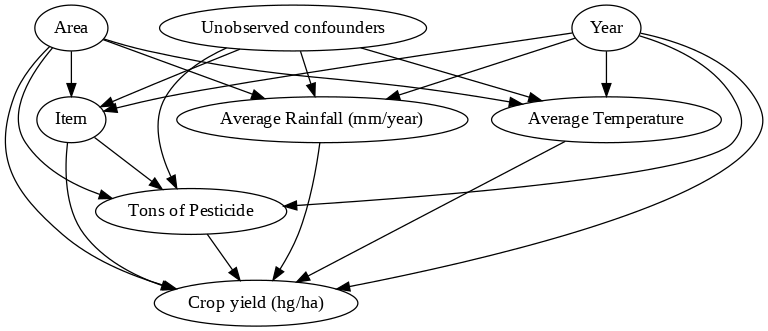

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                                                              
────────────────────────────────(Expectation(hg_ha_yield|avg_temp,Item,Area,Ye
d[average_rain_fall_mm_per_year]                                              

                      
ar,pesticides_tonnes))
                      
Estimand assumption 1, Unconfoundedness: If U→{average_rain_fall_mm_per_year} and U→hg_ha_yield then P(hg_ha_yield|average_rain_fall_mm_per_year,avg_temp,Item,Area,Year,pesticides_tonnes,U) = P(hg_ha_yield|average_rain_fall_mm_per_year,avg_temp,Item,Area,Year,pesticides_tonnes)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        

In [33]:
from dowhy import CausalModel
import numpy as np


avg_on_cols = ["Area", "Year"]
treatments=["avg_temp", "pesticides_tonnes", "average_rain_fall_mm_per_year"]
outcome="hg_ha_yield"

causalYieldDF = yieldDF.copy()

outcome_cutoffs = causalYieldDF.groupby(avg_on_cols).mean()['hg_ha_yield'].to_dict()
causalYieldDF[outcome] = causalYieldDF.apply(lambda row: True if row[outcome] > outcome_cutoffs[row[avg_on_cols[0]], row[avg_on_cols[1]]] else False, axis=1)
#outcome_cutoff = causalYieldDF[outcome].mean()
#causalYieldDF[outcome] = causalYieldDF[outcome].apply(lambda x: True if x > outcome_cutoff else False)


estimates = {}
identified_estimands = {}
models = {}
biggestEstimate = 0

for treatment in treatments:
  causalYieldDFcopy = causalYieldDF.copy()
  treatment_cutoff=yieldDF[treatment].mean()
  causalYieldDFcopy[treatment] = causalYieldDFcopy[treatment].apply(lambda x: True if x > treatment_cutoff else False)
   
  # I. Create a causal model from the data and given graph.
  models[treatment] = CausalModel(
      data=causalYieldDFcopy,
      treatment=treatment,
      outcome=outcome,
      graph=causal_graph.replace("\n", " "))
  
  display(causalYieldDFcopy.head(5))
  print()

  if treatment == treatments[len(treatments)-1]:
    models[treatment].view_model()
    from IPython.display import Image, display
    display(Image(filename="causal_model.png"))

  # II. Identify causal effect and return target estimands
  identified_estimands[treatment] = models[treatment].identify_effect(proceed_when_unidentifiable=True)
  print(identified_estimands[treatment])

  # III. Estimate the target estimand using a statistical method.
  estimates[treatment] = models[treatment].estimate_effect(identified_estimands[treatment],
                                  method_name="backdoor.propensity_score_stratification", target_units="ate")

  print(estimates[treatment])

  if (np.abs(estimates[treatment].value) > biggestEstimate):
    biggestEstimate = np.abs(estimates[treatment].value)
    bestModel = models[treatment]
    bestIdentifiedEstimand = identified_estimands[treatment]
    bestEstimate = estimates[treatment]
    bestTreatment = treatment

In [34]:
print("Causal Model Results (What treatment has a causal relationship to crop yield?)")
causal_model_estimates = pd.DataFrame({
    'Treatment'   : treatments,
    'Estimated Effect': [x.value for x in estimates.values()],
    }, columns = ["Treatment", "Estimated Effect"])

display(causal_model_estimates)

print(f"\nThis tells us that, according to this data, on an average the Probability of crop yield being lower than the mean yield increases by ~19.7% when the temperature is greater than the mean temperature.")

Causal Model Results (What treatment has a causal relationship to crop yield?)


,Treatment,Estimated Effect
0,avg_temp,-0.197101
1,pesticides_tonnes,-0.024499
2,average_rain_fall_mm_per_year,0.098958



This tells us that, according to this data, on an average the Probability of crop yield being lower than the mean yield increases by ~19.7% when the temperature is greater than the mean temperature.


# Causal Model Robustness Checks
Refuting Obtained Causal Model Results with Robustness Checks (Does this treatment (Average Rainfall) really have a causal relationship to crop yield?)

**Random Common Cause:**- Adds randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. If our assumption was originally correct then there shouldn’t much variation in the causal estimate.

**Placebo Treatment Refuter:**- Randomly assigns any covariate as a treatment and re-runs the analysis. If our assumptions were correct then this newly found out estimate should go to 0.

**Data Subset Refuter:**- Creates subsets of the data(similar to cross-validation) and checks whether the causal estimates vary across subsets. If our assumptions were correct there shouldn’t be much variation.

[Citation: Beyond Predictive Models: The Causal Story](https://towardsdatascience.com/beyond-predictive-models-the-causal-story-behind-hotel-booking-cancellations-d29e8558cbaf)

In [35]:
# IV. Refute the obtained estimate using multiple robustness checks.
treatment_to_refute = 'average_rain_fall_mm_per_year'
refute_methods = ["random_common_cause", "placebo_treatment_refuter", "data_subset_refuter"]
refute_results = {}

for method in refute_methods:
  print(f"Trying method: {method}")
  refute_results[method]=models[treatment_to_refute].refute_estimate(identified_estimands[treatment_to_refute], estimates[treatment_to_refute], method_name=method)

Trying method: random_common_cause
Trying method: placebo_treatment_refuter
Trying method: data_subset_refuter


In [36]:
methods = []
est_effects = []
new_effects = []
for result in refute_results.values():
  result = str(result).split('\n')
  methods.append(result[0].split(':')[1])
  est_effects.append(result[1].split(':')[1][:6])
  new_effects.append(result[2].split(':')[1][:6])

robustness_checks = pd.DataFrame({
    'Refutal Method'   : methods,
    'Estimated Effect' : est_effects,
    'New Effect': new_effects,
    'p-value': [x.refutation_result['p_value'] for x in refute_results.values()],
    }, columns = ["Refutal Method", "Estimated Effect", "New Effect", "p-value"])

display(robustness_checks)

treatment = treatment_to_refute
bestModel = models[treatment]
bestIdentifiedEstimand = identified_estimands[treatment]
bestEstimate = estimates[treatment]
bestTreatment = treatment

,Refutal Method,Estimated Effect,New Effect,p-value
0,Add a random common cause,0.0989,0.0989,0.78
1,Use a Placebo Treatment,0.0989,0.0002,0.94
2,Use a subset of data,0.0989,0.0092,0.58
